In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
social_network_ads = pd.read_csv('/content/drive/Shareddrives/NHÓM HỌC TẬP /NĂM 3/PHÂN TÍCH DỮ LIỆU VỚI R PYTHON/SEMINAR/PHẦN 2: CASE STUDY/SEMINAR DATA/Social_Network_Ads.csv', encoding= 'unicode_escape')
print(social_network_ads)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
#Model before EDA
X = social_network_ads.iloc[:, :-1].values
y = social_network_ads.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.675

# 2.4.1 Phân tích và khai thác dữ liệu EDA 

In [ ]:
social_network_ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#check thông tin bộ dữ liệu, kiểu dữ liệu, xem có giá trị null không?
social_network_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#check xem có giá trị bị thiếu không?
social_network_ads.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#check xem dữ liệu có duplicated hay không?
social_network_ads.duplicated().sum()

0

In [ ]:
#Xóa cột User ID
social_network_ads.drop('User ID', axis = 1, inplace=True)

In [ ]:
social_network_ads

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
#Tổng quan về dữ liệu
social_network_ads.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:>

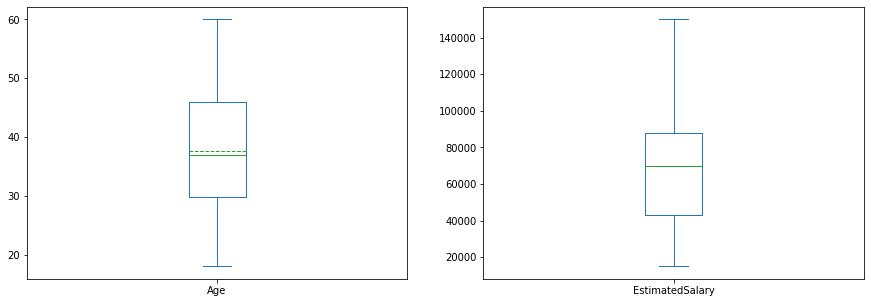

In [ ]:
#Kiểm tra giá trị ngoại lệ
fig, ax = plt.subplots(1,2, figsize = (15, 5)) #1 dòng, 2 cột
social_network_ads['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True) 
#meanline: hiển thị đường trung bình
social_network_ads['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

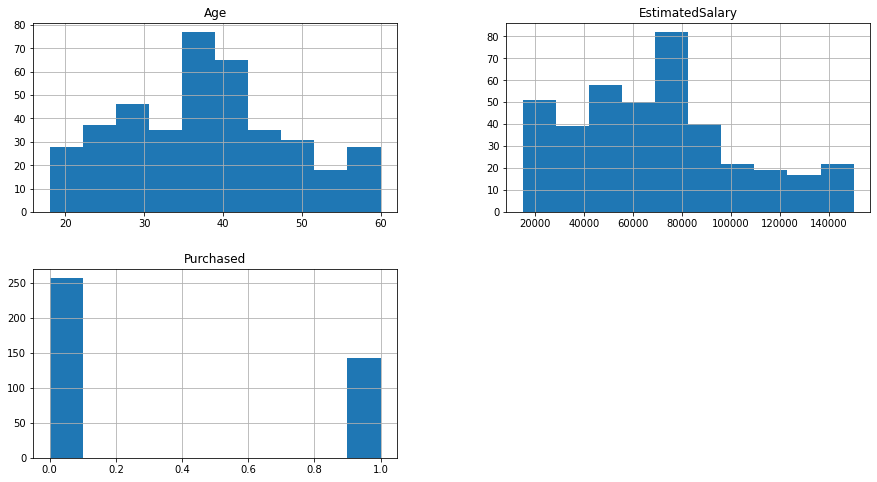

In [ ]:
social_network_ads.hist(figsize = (15, 8))

In [ ]:
#Đếm giá trị của cột Gender
social_network_ads['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

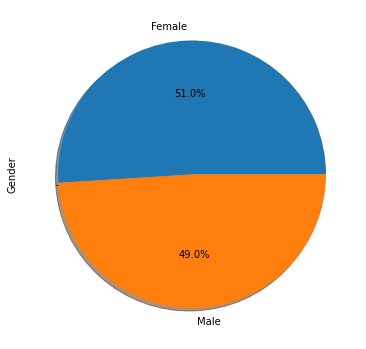

In [ ]:
social_network_ads['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8))

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Value')

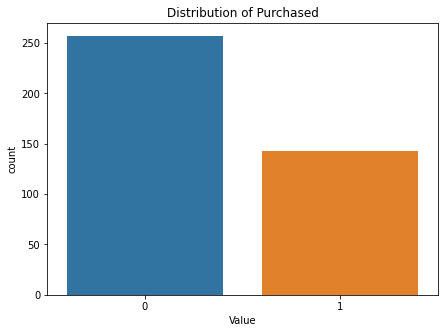

In [ ]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot('Purchased', data = social_network_ads)
ax.set_title('Distribution of Purchased')
ax.set_xlabel('Value')

<AxesSubplot:ylabel='Purchased'>

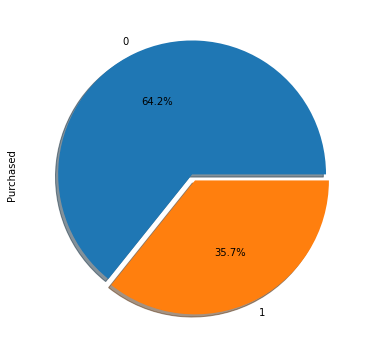

In [ ]:
social_network_ads['Purchased'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8), explode = [0, 0.05])

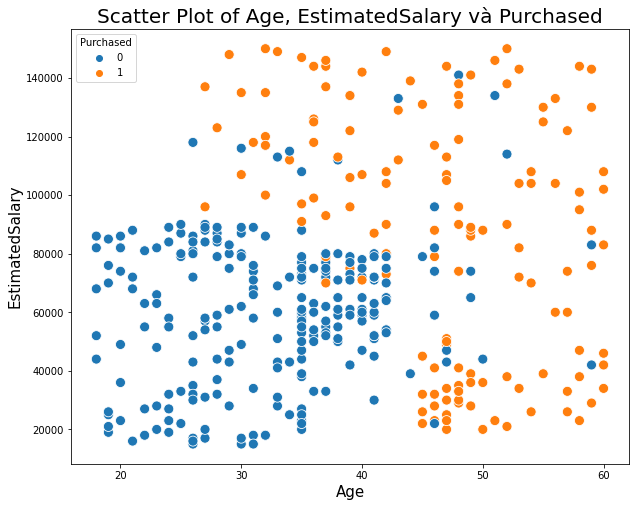

In [ ]:
#Phân tích các biến bằng cách sử dụng đồ thị phân tán
plt.figure(figsize=(10,8))
plt.title('Scatter Plot of Age, EstimatedSalary và Purchased', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('EstimatedSalary', fontsize=15)
sns.scatterplot(data=social_network_ads,x='Age',y= 'EstimatedSalary', hue='Purchased', s=100);

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of Gender, Age và Purchased'}, xlabel='Gender', ylabel='Age'>

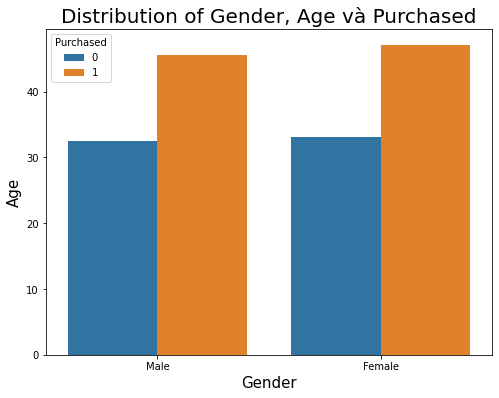

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Gender, Age và Purchased', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Age', fontsize=15)
sns.barplot('Gender', 'Age',data = social_network_ads, hue = 'Purchased', ci=False)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of Gender, EstimatedSalary và Purchased'}, xlabel='Gender', ylabel='EstimatedSalary'>

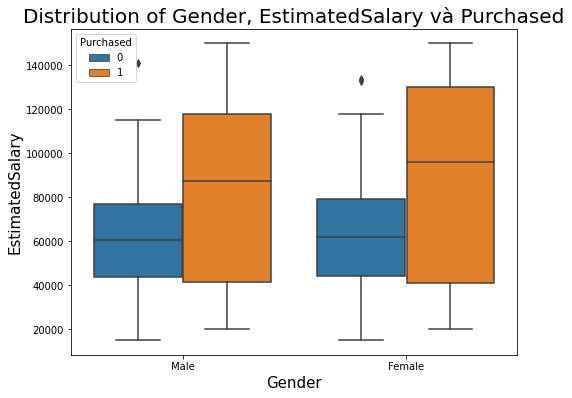

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Gender, EstimatedSalary và Purchased', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('EstimatedSalary', fontsize=15)
sns.boxplot('Gender', 'EstimatedSalary',data = social_network_ads, hue = 'Purchased')

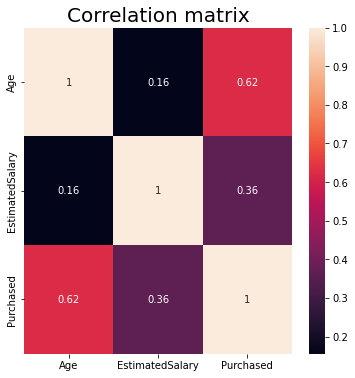

In [ ]:
#ma trận tương quan giữa các biến
plt.figure(figsize=(6, 6))
sns.heatmap(social_network_ads.corr(), annot=True)
plt.title('Correlation matrix', fontsize=20);

In [ ]:
X = social_network_ads.drop('Purchased', axis = 1)
y = social_network_ads['Purchased']

In [ ]:
#Drop cột Gender
social_network_ads.drop('Gender', axis = 1, inplace=True)

#2.4.2 Tiền xử lý dữ liệu

##Chia biến
Slicing it into independent and dependent variables

In [ ]:
social_network_ads

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
#independent variables
X = social_network_ads.iloc[:, :-1].values
y = social_network_ads.iloc[:, -1].values

##Chia tập train - test
Performing a train test split on the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Standard Scaler
feature scaling to the training and test set of independent variables for reducing the size to smaller values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#After StandardScaler
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

##Chạy model sau EDA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("KNN's Accuracy: ", ac)

KNN's Accuracy:  0.95


#2.5.1 Mô hình KNN với k thay đổi

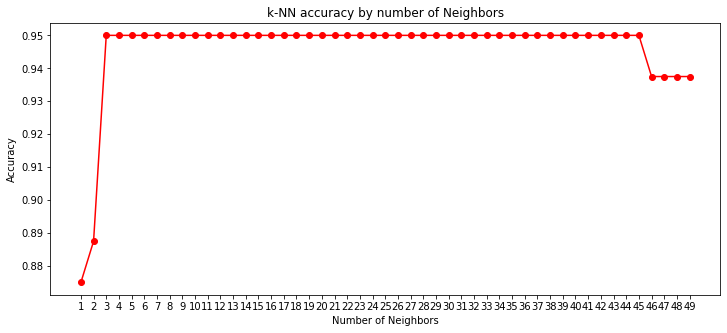

KNN best accuracy: 95.00%


In [ ]:
#khởi tạo chuỗi
scoreListknn = [] 
#Khởi tạo huấn huyện mô hình knn với vòng lặp thay đổi k từ 1->30
for k in range(1,50):
    KNclassifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    KNclassifier.fit(X_train, y_train)
#Thêm phần tử đánh giá mô hình trên dữ liệu test
    scoreListknn.append(KNclassifier.score(X_test, y_test))
#Trực quan hóa kết quả đánh giá mô hình khi thay đổi K
plt.figure(figsize=(12,5))
plt.plot(range(1,50), scoreListknn,c='red',marker='o')
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN accuracy by number of Neighbors')
plt.show()
#in giá trị accuracy tốt nhất
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [ ]:
#Tìm k tối ưu bằng thuộc tính best_params_
#Đầu tiên mình phải nạp hàm GridSearchCV
from sklearn.model_selection import GridSearchCV
#Tiến hành chia tập huấn luyện và tập kiểm tra
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,50)},cv=5)
knn_grid.fit(X_train,y_train)
knn_grid.best_params_
#tham khảo
#https://datasciencebasic.com/?p=134 

{'n_neighbors': 9}

Vậy ta chọn n_neighbors (hay k) = 9

# 2.5.2 Mô hình KNN với lời nguyền của chiều dữ liệu

##Trước khi sử dụng PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("KNN's Accuracy: ", ac)

KNN's Accuracy:  0.95


##PCA (Principle Component Analysis)
Biến X có 2 chiều dữ liệu: Age, EstimatedSalary

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Áp dụng PCA với số chiều = 1
pca = PCA(n_components = 1)
  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [ ]:
#Show tập X_train sau khi áp dụng PCA
X_train_pca

array([[ 2.87719326e+00],
       [ 1.69626440e+00],
       [-1.28319658e+00],
       [-1.55544679e+00],
       [ 7.05640353e-01],
       [ 4.66252930e-01],
       [ 2.26344433e-01],
       [ 2.65912277e+00],
       [-5.77611383e-02],
       [-1.22124121e-02],
       [ 1.38471359e-01],
       [ 1.47466002e+00],
       [-1.49533939e+00],
       [-1.66515786e+00],
       [-6.89092481e-01],
       [-2.37041168e-01],
       [-1.18804417e+00],
       [-8.41751681e-02],
       [ 1.08354668e+00],
       [ 9.57925288e-01],
       [-2.36210591e-01],
       [ 5.98323079e-01],
       [-4.23291028e-01],
       [ 9.05618302e-01],
       [-5.50578348e-02],
       [ 1.71404745e+00],
       [-5.18443436e-01],
       [-1.97941198e-01],
       [-5.60767784e-01],
       [-2.94445257e-01],
       [-1.14166487e+00],
       [-6.29506162e-01],
       [ 3.22848493e-01],
       [ 1.74868025e-01],
       [ 5.90001597e-01],
       [ 6.40126353e-01],
       [ 1.71727182e+00],
       [-1.05492094e-01],
       [ 7.8

##Sau khi sử dụng PCA

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_test_pca)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("KNN's Accuracy: ", ac)

KNN's Accuracy:  0.875


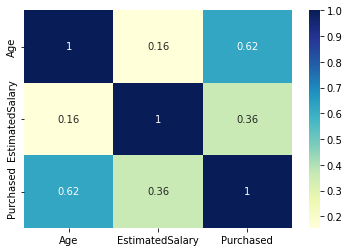

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb

dataplot = sb.heatmap(social_network_ads.corr(), cmap="YlGnBu", annot=True)
mp.show()

#2.5.3 Mô hình khác có thể áp dụng vào bài toán - Random Forest

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

####Setting up the Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

##Practice

In [ ]:
print(X_trainset.shape)
print(y_trainset.shape)

(320, 2)
(320,)


In [ ]:
print(X_testset.shape)
print(y_testset.shape)

(80, 2)
(80,)


##Modeling

In [ ]:
purchasedTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
purchasedTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
purchasedTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##Prediction

In [ ]:
predTree = purchasedTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])

[0 1 1 0 0]
[0 1 1 0 0]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.925


# 2.6 Đánh giá và kết luận

**Mô hình KNN với k thay đổi**

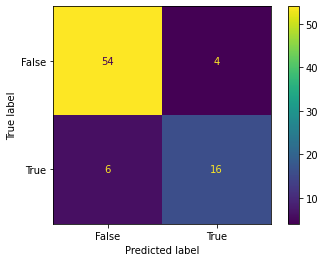

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred)
cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm1_display.plot()
plt.show()


In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup neighbors arrays
neighbors = np.arange(1,60)
train_score =np.empty(len(neighbors))
test_score = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_score[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_score[i] = knn.score(X_test, y_test) 

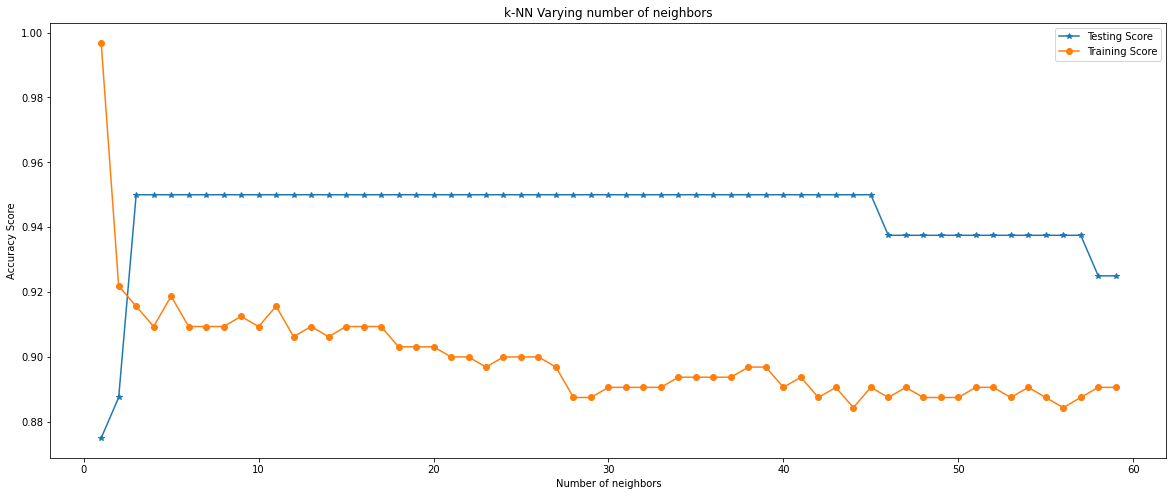

In [ ]:
#Generate plot
plt.figure(figsize=(20,8))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_score, marker='*', label='Testing Score')
plt.plot(neighbors, train_score, marker='o', label='Training Score')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_score)
min_train_score = min(train_score)
max_train_scores_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
min_train_scores_ind = [i for i, v in enumerate(train_score) if v == min_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, max_train_scores_ind))))
print('Min train score {} % and k = {}'.format(min_train_score*100,list(map(lambda x: x+1, min_train_scores_ind))))

Max train score 99.6875 % and k = [1]
Min train score 88.4375 % and k = [44, 56]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_score)
min_test_score = min(test_score)
max_test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
min_test_scores_ind = [i for i, v in enumerate(test_score) if v == min_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, max_test_scores_ind))))
print('Min test score {} % and k = {}'.format(min_test_score*100,list(map(lambda x: x+1, min_test_scores_ind))))

Max test score 95.0 % and k = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Min test score 87.5 % and k = [1]


In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,60)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.903125
Best Parameters: {'n_neighbors': 9}


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
print('Accuracy Score: ' + str(acc))
print('ROC AUC Score: ' + str(roc))
print('Recall Score: ' + str(rec))
print('F1 Score: ' + str(f1s))
print('Precision Score: ' + str(pre))

Accuracy Score: 0.95
ROC AUC Score: 0.95141065830721
Recall Score: 0.9545454545454546
F1 Score: 0.9130434782608695
Precision Score: 0.875


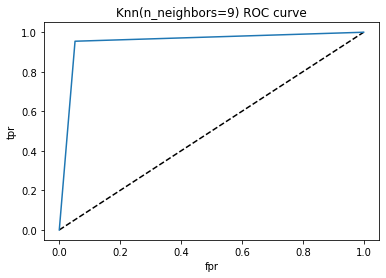

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

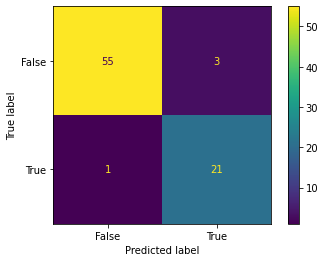

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix1 = confusion_matrix(y_test,y_pred)

cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])

cm1_display.plot()

plt.show()


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



**Mô hình KNN với lời nguyền của chiều dữ liệu**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred1 = classifier.predict(X_test_pca)
acc1 = accuracy_score(y_test, y_pred1)
roc1 = roc_auc_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1s1 = f1_score(y_test, y_pred1)
pre1 = precision_score(y_test, y_pred1)
print('Accuracy Score: ' + str(acc1))
print('ROC AUC Score: ' + str(roc1))
print('Recall Score: ' + str(rec1))
print('F1 Score: ' + str(f1s1))
print('Precision Score: ' + str(pre1))

Accuracy Score: 0.875
ROC AUC Score: 0.829153605015674
Recall Score: 0.7272727272727273
F1 Score: 0.761904761904762
Precision Score: 0.8


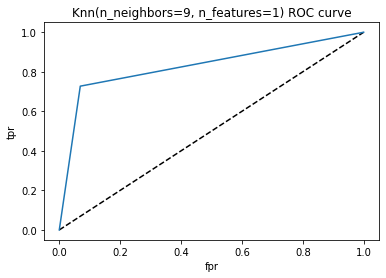

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9, n_features=1) ROC curve')
plt.show()

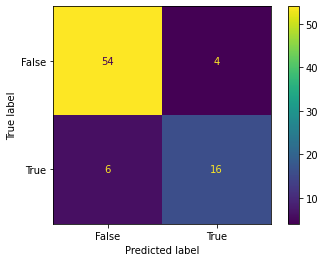

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.93      0.92        58
     class 1       0.80      0.73      0.76        22

    accuracy                           0.88        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.87      0.88      0.87        80



**Mô hình Decision Tree**

In [ ]:
acc2 = accuracy_score(y_testset, predTree)
roc2 = roc_auc_score(y_testset, predTree)
rec2 = recall_score(y_testset, predTree)
f1s2 = f1_score(y_testset, predTree)
pre2 = precision_score(y_testset, predTree)
print("DecisionTrees's Accuracy Score: " + str(acc2))
print("DecisionTrees's ROC AUC Score: " + str(roc2))
print("DecisionTrees's Recall Score: " + str(rec2))
print("DecisionTrees's F1 Score: " + str(f1s2))
print("DecisionTrees's Precision Score: " + str(pre2))

DecisionTrees's Accuracy Score: 0.925
DecisionTrees's ROC AUC Score: 0.9127272727272727
DecisionTrees's Recall Score: 0.88
DecisionTrees's F1 Score: 0.88
DecisionTrees's Precision Score: 0.88


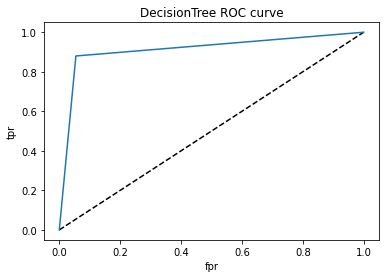

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(y_testset, predTree)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2, label='DecisionTree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('DecisionTree ROC curve')
plt.show()

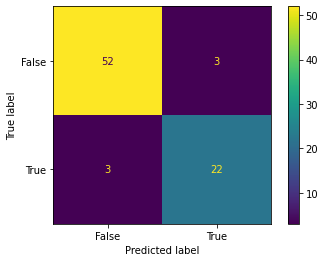

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix2 = metrics.confusion_matrix(y_testset, predTree)

cm2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm2_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_testset, predTree, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95        55
     class 1       0.88      0.88      0.88        25

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



Text(0.5, 1.0, 'Models Evaluation')

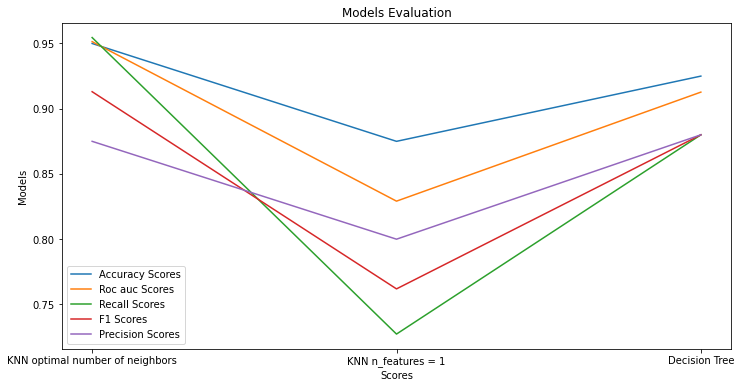

In [ ]:
acc_scores = [acc, acc1, acc2]
roc_scores = [roc, roc1, roc2]
rec_scores = [rec, rec1, rec2]
f1s_scores = [f1s, f1s1, f1s2]
pre_scores = [pre, pre1, pre2]
models = ['KNN optimal number of neighbors', 'KNN n_features = 1', 'Decision Tree']
plt.figure(figsize = (12,6))
plt.plot(models, acc_scores, label='Accuracy Scores')
plt.plot(models, roc_scores, label='Roc auc Scores')
plt.plot(models, rec_scores, label='Recall Scores')
plt.plot(models, f1s_scores, label='F1 Scores')
plt.plot(models, pre_scores, label='Precision Scores')
plt.xlabel('Scores')
plt.ylabel('Models')
plt.legend()
plt.title('Models Evaluation')